In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:

function run_example()
    p = 120.0;
    k = (0.05 / 1.25) * p;
    δ = 0.15;
    function H(x)
        if x >= 0
            return 1
        else
            return 0
        end
    end

    function FR12(x, a1, a2)
        lambda1 = 0.25
        lambda2 = 0.5
        return (
            -lambda2 *
            (H(x - a1 - a2) - H(x - a1)) *
            exp(lambda2 * (-x + a1) - lambda1 * a1) +
            lambda1 *
            (H(x - a1 - a2) - H(x - a2)) *
            exp(lambda1 * (-x + a2) - lambda2 * a2) +
            H(x - a2) * exp(-lambda2 * x) * lambda1 -
            H(x - a1) * exp(-lambda1 * x) * lambda2 -
            exp(-lambda2 * x) * lambda1 +
            exp(-lambda1 * x) * lambda2 +
            lambda1 - lambda2
        ) / (lambda1 - lambda2)
    end

    F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
    #F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
    F2(x) = 1 - exp(-0.7071067812 * sqrt(x))


    function FR1(x, a)
        if x < a
            return F1(x)
        else
            return 1.0
        end
    end

    function FR2(x, a2)
        if x < a2
            return F2(x)
        else
            return 1.0
        end
    end

    FR(r, x) =
        0.3333333333333333 * FR1(x, r[1]) +
        0.4 * FR2(x, r[2]) +
        0.26666666666666666 * FR12(x, r[1], r[2])

    function ER1(a) ###Gamma
        beta = 1.25
        return (-a^2 * beta^2 - 4 * a * beta + 6 * exp(a * beta) - 6) * exp(-a * beta) / (2 * beta)
    end

    ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))
    function ER12(a1, a2)
        beta1 = 0.25
        beta2 = 0.5
        return 1 / beta1 - exp(-a1 * beta1) / beta1 + 1 / beta2 - exp(-a2 * beta2) / beta2
    end
    ER(r) =
        0.3333333333333333 * ER1(r[1]) +
        0.4 * ER2(r[2]) +
        0.26666666666666666 * ER12(r[1], r[2])

    EnoR = ER([200.0, 100000.0])

    res = bisection_hjbsolver(
        a=166.0,
        b=333.0,
        max_it=20,
        NRe=2,
        β=5.0 + 6.0 + 4.0,
        FR=FR,
        ER=ER,
        EnoR=EnoR,
        partition=(0.0, 10.0, 300.0, 700.0),
        Δx=0.05,
        SearchRanges=([(0.02, 200.0), (0.02, 200.0)], [(1.0, 200.0), (1.0, 200.0)]),
        η=0.25,
        η1=0.3,
        δ=0.15,
        MaxEvals=3000,
        p=p,
        L=300,
    )
    return res
end

run (generic function with 1 method)

In [3]:
res = run_example();

(166.0, 249.5, 333.0)
10%, V(70.0) = 1218.3   Time = 136.0 seconds
20%, V(140.0) = 1798.0   Time = 544.0 seconds
30%, V(210.0) = 2428.2   Time = 1230.0 seconds
40%, V(280.0) = 3181.0   Time = 2110.0 seconds
50%, V(350.0) = 4157.5   Time = 2370.0 seconds
60%, V(420.0) = 5534.5   Time = 2380.0 seconds
70%, V(490.0) = 7626.8   Time = 2380.0 seconds
(166.0, 207.75, 249.5)
10%, V(70.0) = 983.61   Time = 110.0 seconds
20%, V(140.0) = 1363.0   Time = 434.0 seconds
30%, V(210.0) = 1646.8   Time = 955.0 seconds
40%, V(280.0) = 1724.1   Time = 1650.0 seconds
(207.75, 228.625, 249.5)
10%, V(70.0) = 1098.7   Time = 111.0 seconds
20%, V(140.0) = 1576.5   Time = 441.0 seconds
30%, V(210.0) = 2031.0   Time = 996.0 seconds
40%, V(280.0) = 2471.3   Time = 1780.0 seconds
50%, V(350.0) = 2890.1   Time = 2040.0 seconds
60%, V(420.0) = 3271.1   Time = 2040.0 seconds
70%, V(490.0) = 3584.8   Time = 2040.0 seconds
80%, V(560.0) = 3778.4   Time = 2040.0 seconds
(228.625, 239.0625, 249.5)
10%, V(70.0) = 1156.2

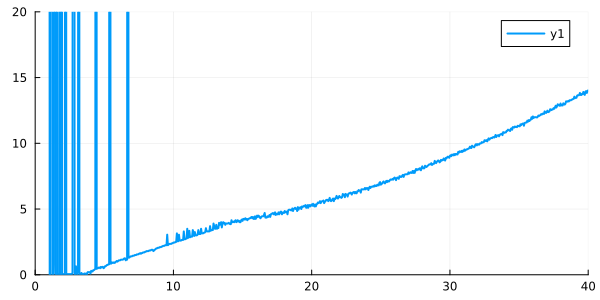

In [4]:
plot(res[end][1], res[end][4][:, 1], size = (600, 300), xlims = (0, 40),ylims = (0, 20), linewidth=2)

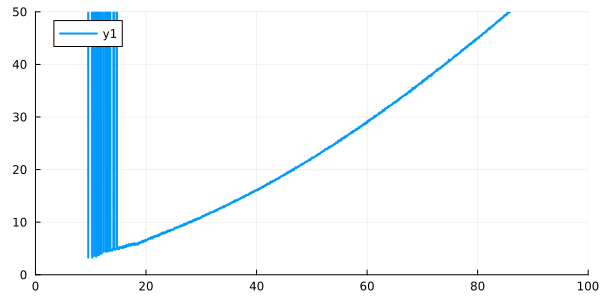

In [5]:
plot(
    res[end][1],
    res[end][4][:, 2],
    size = (600, 300),
    xlims = (0, 100),
    ylims = (0, 50),
    linewidth=2
)

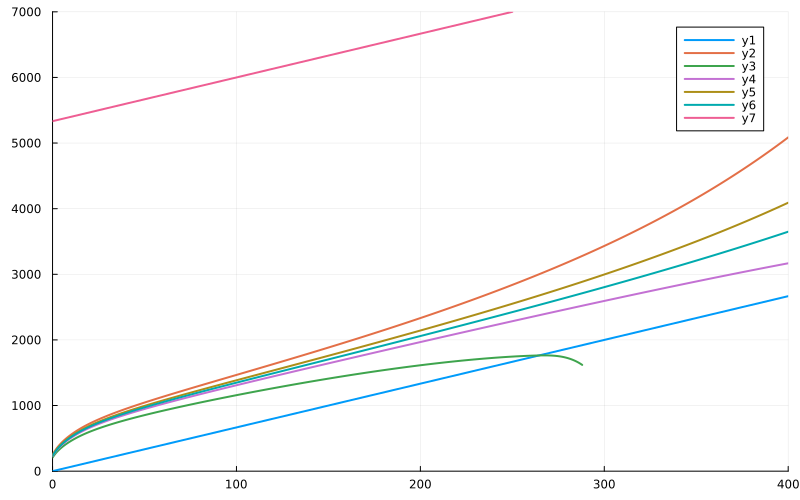

In [12]:
p = 120.0;
δ = 0.15;
plot(x -> x / δ, xlims=(0, 400), size=(800, 500),ylims=(0,7000), linewidth=2)
for i = 1:length(res)
    plot!(res[i][1], res[i][2], linewidth=2)
end
plot!(x -> x / δ + p / δ^2,  linewidth=2)